<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/ADVANCED-ML/2348549_AML_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

In [32]:
df = pd.read_csv('/content/Program_1_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [33]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

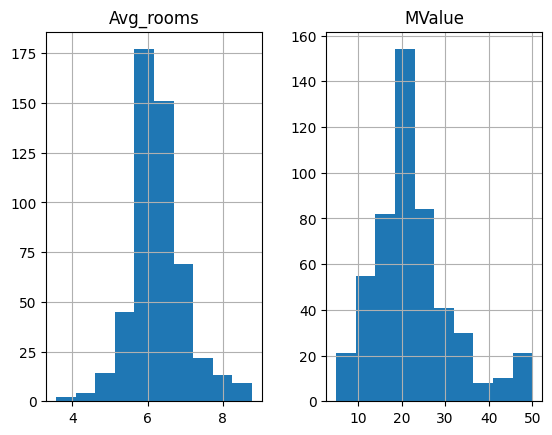

In [37]:
attribute = df[['Avg_rooms','MValue']]
attribute.hist()
plt.show()

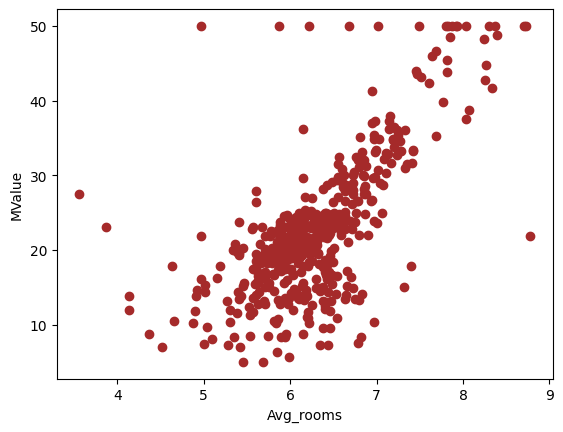

In [38]:
plt.scatter(attribute.Avg_rooms, attribute.MValue,  color='brown')
plt.xlabel("Avg_rooms")
plt.ylabel("MValue")
plt.show()

In [39]:
msk = np.random.rand(len(df)) < 0.7
train = attribute[msk]
test = attribute[~msk]

In [40]:
from sklearn import linear_model

In [41]:
regr = linear_model.LinearRegression()

In [42]:
train_x = np.asanyarray(train[['Avg_rooms']])
train_y = np.asanyarray(train[['MValue']])
regr.fit(train_x, train_y)

LinearRegression()

In [43]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[8.92048152]]
Intercept:  [-33.23173665]


Text(0, 0.5, 'MValue')

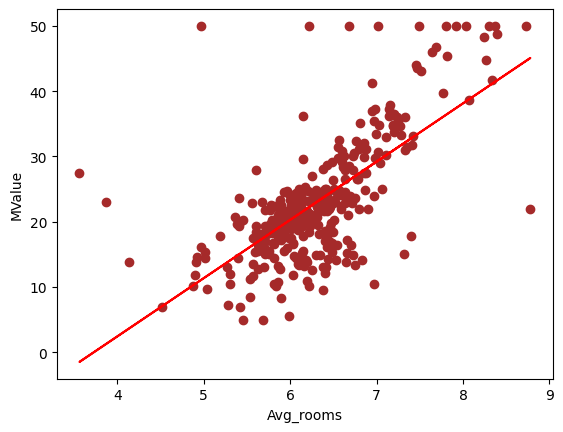

In [44]:
plt.scatter(train.Avg_rooms, train.MValue,  color='brown')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Avg_rooms")
plt.ylabel("MValue")

In [45]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Avg_rooms']])
test_y = np.asanyarray(test[['MValue']])
prediction = regr.predict(test_x)


In [46]:

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , prediction) )

Mean absolute error: 4.39
Residual sum of squares (MSE): 43.07
R2-score: 0.50
